# What is Linear Regression? 

Linear Regression is a method to model the **relationship** between a set of **independent variables $X$** (also knowns as explanatory variables, features, predictors) and a **dependent variable $Y$**.


### The Magic Formula

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

**What does each term mean?**

- Y is the response
- X is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for X
- $\epsilon$ is the error term

$\beta_0$ and $\beta_1$ are called the **model coefficients**

#### This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

#### Dataset Naming
##### The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

##### There are 14 attributes in each case of the dataset. They are:
        CRIM - per capita crime rate by town
        ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        INDUS - proportion of non-retail business acres per town.
        CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        NOX - nitric oxides concentration (parts per 10 million)
        RM - average number of rooms per dwelling
        AGE - proportion of owner-occupied units built prior to 1940
        DIS - weighted distances to five Boston employment centres
        RAD - index of accessibility to radial highways
        TAX - full-value property-tax rate per "10,000 dollar"
        PTRATIO - pupil-teacher ratio by town
        B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT - % lower status of the population
        MEDV - Median value of owner-occupied homes in 1000 dollar

### Import Libraries

In [1]:
# Import Libraries 
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Boston Housing Dataset

In [2]:
# read data into a DataFrame
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Get the Target Variable 

In [3]:
df['MEDV'] = boston_dataset.target
df['LOGMEDV'] = np.log(df.MEDV+1) # Get Log Transformed MEDV
Y = df.MEDV

### Plot Price Distribution

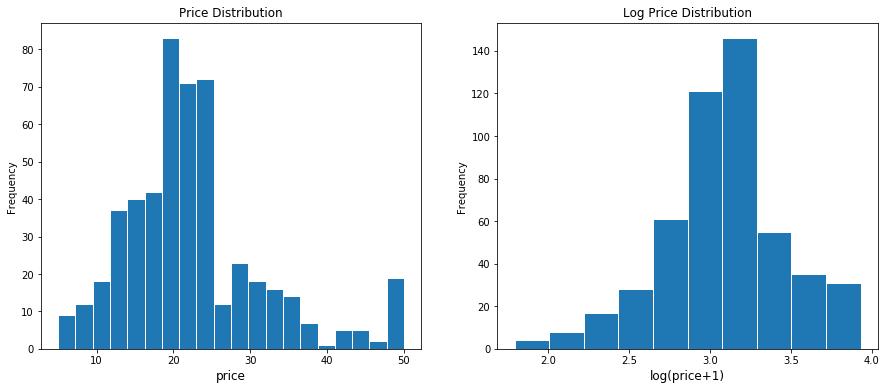

In [4]:
# Plot Price Distribution
plt.subplot(1, 2, 1)
(df.MEDV).plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

#Plot Log Price Distribution
plt.subplot(1, 2, 2)
(df.LOGMEDV).plot.hist( figsize=(15,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log Price Distribution', fontsize=12)


plt.show()

## Visualize and Examine 

Are there any linear relationships between some of the IV's and the DV?

Is it:
- Strong? Weak?
- Positive? Negative?
- Linear? Non-Linear?

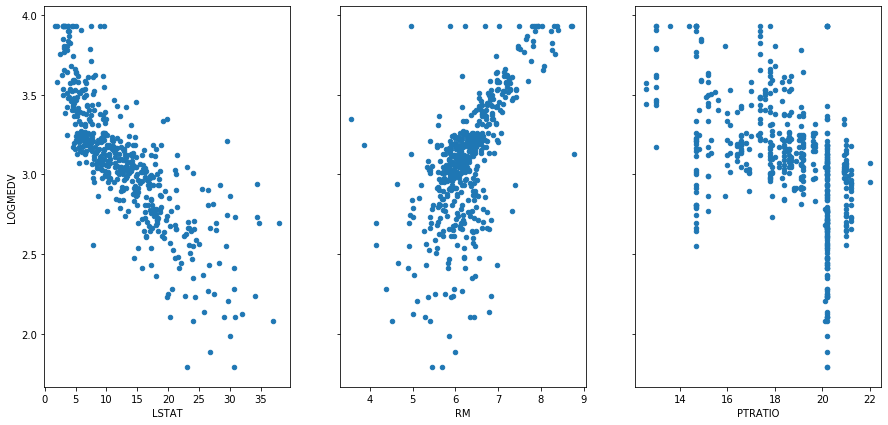

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='LSTAT', y='LOGMEDV', ax=axs[0], figsize=(15, 7))
df.plot(kind='scatter', x='RM', y='LOGMEDV', ax=axs[1])
df.plot(kind='scatter', x='PTRATIO', y='LOGMEDV', ax=axs[2])

# Finding Parameters: B0 and B1
***

The question is: how do we find values for the **intercept** and **slope**?

There are two ways:
1. There is an **analytical solution** - Known as the Normal Equation / OLS
2. There is also a **numerical approximation** method known as Gradient Descent

In [12]:
import statsmodels.api as sm

# Define X Values
X = sm.add_constant(df.drop(['MEDV','LOGMEDV'],axis=1))

# Define Y 
Y = df.MEDV

# Apply OLS to our X and Y
lm = sm.OLS(Y, X).fit()

# Print Summary of Outputs
lm.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 16 May 2020   Prob (F-statistic):          6.72e-135
Time:                        17:59:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<img src='https://static1.squarespace.com/static/58f7c433bf629a737d4092ee/5aa9f7dc8165f531654c9d28/5ab029df88251bfd94890806/1521494499387/web+p+logo.jpg'>

## Detecting Multicollinearity - VIF

**Note:** Multicollinearity isn't so much of a problem if you're main focus is prediction. 

**Why is this a problem:** 
- When two variables are correlated with each other, then they "move together". 
- This is hard for your linear regression model to interpret the exact change of your DV's. 
- It doesn't know which IV is **responsible** for the change in the DV. 
- βi coefficients will be less precise.
- It's harder to accurately interpret the coefficients 

### Reference
- VIF = 1 (Not correlated)
- 1 < VIF < 5 (Moderately correlated)
- VIF >=5 (Highly correlated)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.drop(['MEDV','LOGMEDV'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)

CRIM         1.792192
ZN           2.298758
INDUS        3.991596
CHAS         1.073995
NOX          4.393720
RM           1.933744
AGE          3.100826
DIS          3.955945
RAD          7.484496
TAX          9.008554
PTRATIO      1.799084
B            1.348521
LSTAT        2.941491
const      585.265238
dtype: float64

### Get Necessary Model Parameters (Refit for Log Transformation)

In [14]:
# Non-Logged MEDV
Y = df.MEDV

# Log Transformed MEDV
#Y = df.LOGMEDV

# Apply OLS to our X and Y
lm = sm.OLS(Y, X).fit()

In [15]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm.fittedvalues

# model residuals
model_residuals = lm.resid

# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

## Detecting Heteroskedestacity - Residual Plot

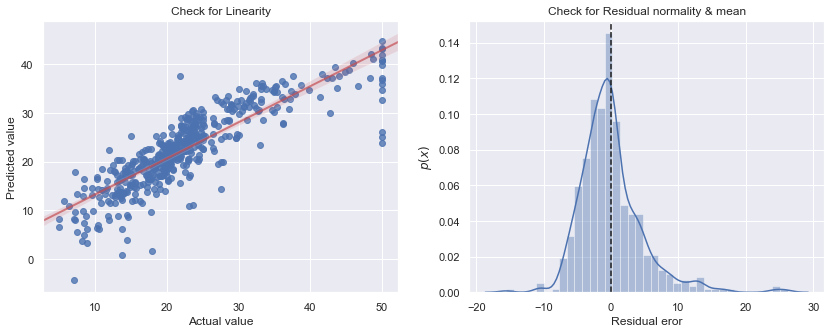

In [17]:
import seaborn as sns; sns.set()

# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
#sns.scatterplot(y_test,y_pred_ols,ax=ax,color=['r','g'])
# use the function regplot to make a scatterplot
sns.regplot(x=df.MEDV, y=model_fitted_y, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((df.MEDV - model_fitted_y),ax=ax,color='b')
plt.axvline((df.MEDV - model_fitted_y).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean')
plt.xlabel('Residual eror')
plt.ylabel('$p(x)$');

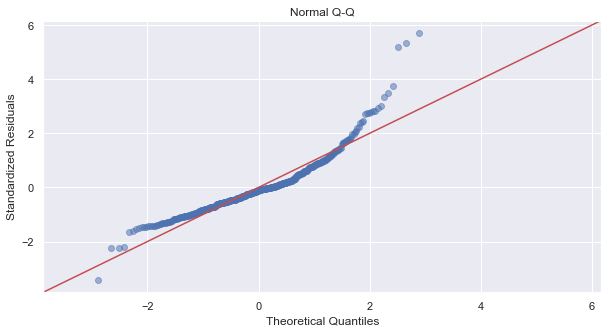

In [19]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(5)
plot_lm_2.set_figwidth(10)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# Modeling
***

## Simple Linear Regression

In [37]:
X = df.LSTAT
X = X.values.reshape((len(X),1)) #X = X.reshape((len(X),1))
Y = df.LOGMEDV

In [38]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [40]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.666
Root Mean Squared Error:  0.215
Mean Absolute Error:  0.161


In [41]:
result = pd.DataFrame({'Model':['Simple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result

,Model,R Squared,RMSE,MAE
0,Simple,0.666,0.215,0.161


## Multiple Regression

In [42]:
X = df.drop(['MEDV','LOGMEDV'],axis=1)
Y = df.LOGMEDV

In [43]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [44]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [45]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.745
Root Mean Squared Error:  0.188
Mean Absolute Error:  0.126


In [46]:
result_2 = pd.DataFrame({'Model':['Multiple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result = result.append(result_2)
result

,Model,R Squared,RMSE,MAE
0,Simple,0.666,0.215,0.161
0,Multiple,0.745,0.188,0.126


## Polynomial Regression

Polynomial regression is useful because it allows you to fit a model to **nonlinear trends**.

It creates **new interaction features** in your dataset by:
- Multiplying features together
- Squaring features
- Cubing features
- Etc..

#### Example
You have a matrix [a,b] and want to perform a polynomial regression of degree=2
- new matrix: [1, a, b, a^2, ab, b^2]

In [47]:
# Original Matrix
np.array(X_train.head(1))

array([[1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
        5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.49480e+02, 2.49100e+01]])

### Import Polynomial Features 

In [48]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(X_train)
X_testpoly = polyfeat.fit_transform(X_test)
poly = LinearRegression().fit(X_trainpoly, y_train)

predp = poly.predict(X_testpoly)

### Examine Polynomial Features

In [49]:
# Polynomial Transformation Matrix
X_trainpoly[0]

array([1.00000000e+00, 1.50234000e+01, 0.00000000e+00, 1.81000000e+01,
       0.00000000e+00, 6.14000000e-01, 5.30400000e+00, 9.73000000e+01,
       2.10070000e+00, 2.40000000e+01, 6.66000000e+02, 2.02000000e+01,
       3.49480000e+02, 2.49100000e+01, 2.25702548e+02, 0.00000000e+00,
       2.71923540e+02, 0.00000000e+00, 9.22436760e+00, 7.96841136e+01,
       1.46177682e+03, 3.15596564e+01, 3.60561600e+02, 1.00055844e+04,
       3.03472680e+02, 5.25037783e+03, 3.74232894e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.27610000e+02,
       0.00000000e+00, 1.11134000e+01, 9.60024000e+01, 1.76113000e+03,
       3.80226700e+01, 4.34400000e+02, 1.20546000e+04, 3.65620000e+02,
       6.32558800e+03, 4.50871000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [50]:
r2 = format(r2_score(y_test, predp),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predp)),'.3f')
mae = format(mean_absolute_error(y_test, predp),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predp),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predp)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predp),'.3f'))

R Squared Score:  0.813
Root Mean Squared Error:  0.161
Mean Absolute Error:  0.117


# Regression Performance Comparison

In [51]:
result_2 = pd.DataFrame({'Model':['Polynomial'],'R Squared':[r2], 'RMSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

,Model,R Squared,RMSE,MAE
0,Simple,0.666,0.215,0.161
0,Multiple,0.745,0.188,0.126
0,Polynomial,0.813,0.161,0.117


# Summary
***

Linear Regression is a powerful, simple, and widely used model. It's great for both predictions and interpretations. Here are some things to keep in mind:

- If all you care about is **prediction**, then correlated features may not be a big deal. 
- If you care about **interpretability** your features must be independent.
- Look at Adjusted R2 when evaluating the performance, it only uses important features for its calculations, whereas R2 will always increase with each addtional new feature.
- Always check the **assumptions** when you are trying to **interpret** the coefficients, OR ELSE your interpretations will be unreliable. 
